# Dive Into DL Pytorch

In [2]:
import numpy as np
import torch

## Chapter 2 --- Prerequired knowledge

### Section 2 --- AutoGrad

In [14]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [15]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [16]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [17]:
out.backward()

In [18]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Chapter 3 --- Basics

### Section 1 --- Linear Model

In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device
/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


In [58]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

print(features[0], labels[0])

tensor([ 0.2435, -0.7149]) tensor(7.1030)


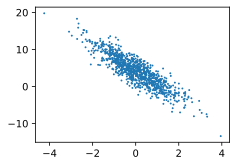

In [59]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [26]:
import torch.utils.data as Data

batch_size = 10

dataset = Data.TensorDataset(features, labels)

data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

In [60]:
from torch import nn
from torch import optim

class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

    def forward(self, x):
        y = self.linear(x)
        return y


In [67]:
net = LinearNet(num_inputs).to("cuda")
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [68]:
loss = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [95]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.view(-1,1))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [64]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [96]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    train(data_iter, net, loss, optimizer)

loss: 0.000132  [    0/ 1000]
loss: 0.000119  [  100/ 1000]
loss: 0.000160  [  200/ 1000]
loss: 0.000113  [  300/ 1000]
loss: 0.000222  [  400/ 1000]
loss: 0.000067  [  500/ 1000]
loss: 0.000055  [  600/ 1000]
loss: 0.000239  [  700/ 1000]
loss: 0.000079  [  800/ 1000]
loss: 0.000052  [  900/ 1000]
loss: 0.000111  [    0/ 1000]
loss: 0.000103  [  100/ 1000]
loss: 0.000149  [  200/ 1000]
loss: 0.000132  [  300/ 1000]
loss: 0.000077  [  400/ 1000]
loss: 0.000118  [  500/ 1000]
loss: 0.000074  [  600/ 1000]
loss: 0.000118  [  700/ 1000]
loss: 0.000055  [  800/ 1000]
loss: 0.000085  [  900/ 1000]
loss: 0.000141  [    0/ 1000]
loss: 0.000052  [  100/ 1000]
loss: 0.000064  [  200/ 1000]
loss: 0.000063  [  300/ 1000]
loss: 0.000172  [  400/ 1000]
loss: 0.000172  [  500/ 1000]
loss: 0.000131  [  600/ 1000]
loss: 0.000044  [  700/ 1000]
loss: 0.000104  [  800/ 1000]
loss: 0.000087  [  900/ 1000]


In [97]:
net.state_dict()

OrderedDict([('linear.weight', tensor([[ 2.0004, -3.4002]], device='cuda:0')),
             ('linear.bias', tensor([4.2000], device='cuda:0'))])

### Section 5 --- Image identification

In [9]:
import torch
import torchvision

from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt
import time
import sys

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


In [11]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [12]:
feature, label = training_data[0]
print(feature.shape, label)

torch.Size([1, 28, 28]) 9


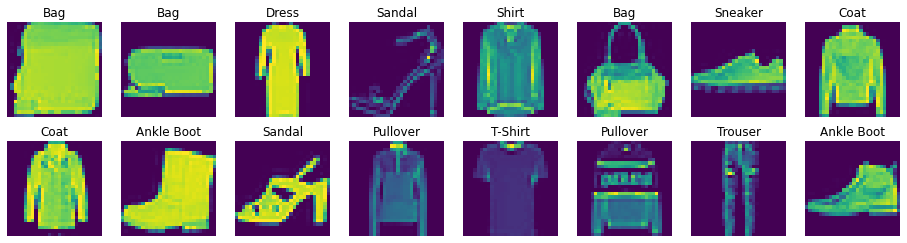

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

cols, rows = 8, 2
figure = plt.figure(figsize=(cols*2, rows*2))
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [14]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [22]:
model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [25]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [28]:
num_epoches = 5

for iter in range(num_epoches):
    print(f"Epoch {iter+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.645233  [    0/60000]
loss: 0.640402  [ 6400/60000]
loss: 0.579991  [12800/60000]
loss: 0.448611  [19200/60000]
loss: 0.886314  [25600/60000]
loss: 0.592785  [32000/60000]
loss: 0.540707  [38400/60000]
loss: 0.611387  [44800/60000]
loss: 0.607069  [51200/60000]
loss: 0.493718  [57600/60000]
Test Error: 
 Accuracy: 69.1%, Avg loss: 0.839885 

Epoch 2
-------------------------------
loss: 0.637106  [    0/60000]
loss: 0.646540  [ 6400/60000]
loss: 0.584787  [12800/60000]
loss: 0.445350  [19200/60000]
loss: 0.866218  [25600/60000]
loss: 0.583533  [32000/60000]
loss: 0.536585  [38400/60000]
loss: 0.607667  [44800/60000]
loss: 0.621634  [51200/60000]
loss: 0.475961  [57600/60000]
Test Error: 
 Accuracy: 69.2%, Avg loss: 0.835214 

Epoch 3
-------------------------------
loss: 0.640207  [    0/60000]
loss: 0.637039  [ 6400/60000]
loss: 0.571082  [12800/60000]
loss: 0.443553  [19200/60000]
loss: 0.872700  [25600/60000]
loss: 0.576747  [32000/600

In [29]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

### Chapter 5 --- Convolution Neuralnetwork

In [36]:
import torch 
from torch import nn

def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [35]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super(Conv2D, self).__init__()
        self.weight = nn.Parameter(torch.randn(kernel_size))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [39]:
torch.rand(8, 8).shape

torch.Size([8, 8])

In [40]:
def comp_conv2d(conv2d, X):
    X = X.view((1, 1) + X.shape)
    Y = conv2d(X)
    return Y.view(Y.shape[2:]) 

In [41]:
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
X = torch.rand(8, 8)

comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

### LeNetWork

In [61]:
import torch
import torchvision

from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import numpy as np

from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt
import time
import sys

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [62]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [63]:
feature, label = training_data[0]
print(feature.shape, label)

torch.Size([1, 28, 28]) 9


In [37]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Sequential(
            nn.Linear(16*4*4, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    def forward(self, img):
        feature = self.conv(img)
        output = self.fc(feature.view(img.shape[0], -1))
        return output

In [52]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    train_l_sum, train_acc_sum, start = 0.0, 0.0, time.time()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_l_sum += loss.cpu().item()
        train_acc_sum += (pred.argmax(dim=1) == y).sum().cpu().item()

    print('loss %.4f, train acc %.3f, time %.1f sec'
            % (train_l_sum / dataloader.batch_size, train_acc_sum / (size), time.time() - start))

    return train_l_sum / dataloader.batch_size, train_acc_sum / (size)


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().cpu().item()
    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, correct

In [74]:
batch_size = 256

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [75]:
model = LeNet().to(device)

loss_fn = nn.CrossEntropyLoss()

In [76]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

In [81]:
num_epoches = 20

train_rec, test_rec = [], []

In [82]:
for iter in range(num_epoches):
    print(f"Epoch {iter+1}\n-------------------------------")
    train_loss, train_acc = train(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test(test_dataloader, model, loss_fn)

    train_rec.append(np.array([train_loss, train_acc]))
    test_rec.append(np.array([test_loss, test_acc]))
print("Done!")

Epoch 1
-------------------------------
loss 0.2051, train acc 0.916, time 3.5 sec
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.308643 

Epoch 2
-------------------------------
loss 0.2017, train acc 0.918, time 3.5 sec
Test Error: 
 Accuracy: 89.1%, Avg loss: 0.309799 

Epoch 3
-------------------------------
loss 0.1968, train acc 0.920, time 3.6 sec
Test Error: 
 Accuracy: 88.9%, Avg loss: 0.316747 

Epoch 4
-------------------------------
loss 0.1917, train acc 0.923, time 3.6 sec
Test Error: 
 Accuracy: 88.9%, Avg loss: 0.303688 

Epoch 5
-------------------------------
loss 0.1889, train acc 0.923, time 3.5 sec
Test Error: 
 Accuracy: 89.8%, Avg loss: 0.298826 

Epoch 6
-------------------------------
loss 0.1842, train acc 0.925, time 3.4 sec
Test Error: 
 Accuracy: 89.1%, Avg loss: 0.321288 

Epoch 7
-------------------------------
loss 0.1801, train acc 0.926, time 3.5 sec
Test Error: 
 Accuracy: 89.1%, Avg loss: 0.307386 

Epoch 8
-------------------------------
loss 0.1786, tr

In [80]:
test_rec

array([], dtype=float64)

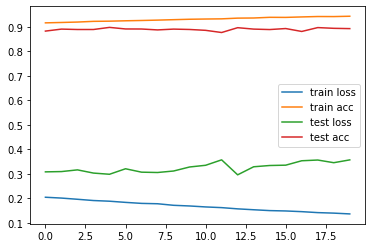

In [83]:

train_record = np.array(train_rec)
test_record = np.array(test_rec)

plt.plot(train_record[:,0], label='train loss')
plt.plot(train_record[:,1], label='train acc')
plt.plot(test_record[:,0], label='test loss')
plt.plot(test_record[:,1], label='test acc')
plt.legend(loc='best')

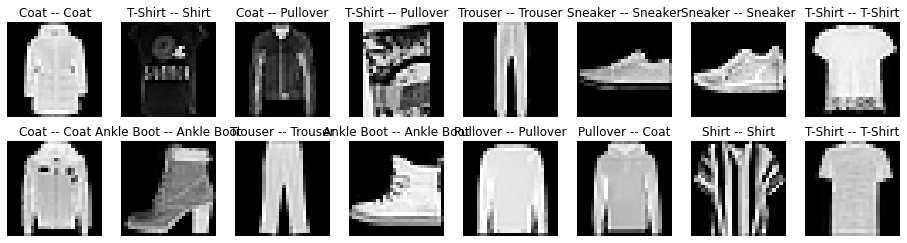

In [145]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

cols, rows = 8, 2
figure = plt.figure(figsize=(cols*2, rows*2))

model.eval()
with torch.no_grad():
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(test_data), size=(1,)).item()
        img, label = test_data[sample_idx]
        pred = model(torch.unsqueeze(img, dim=0)) 
        predict_label = pred[0].argmax(0).cpu().item()
        figure.add_subplot(rows, cols, i)
        plt.title(f'{labels_map[label]} -- {labels_map[predict_label]}')
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap='gray')
    plt.show()

### Alex Network

In [1]:
import torch
import torchvision

from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import numpy as np

from torchvision import datasets
from torchvision.transforms import Resize, ToTensor, Lambda, Compose

import matplotlib.pyplot as plt
import time
import sys

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [2]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 96, 11, 4), # in_channels, out_channels, kernel_size, stride, padding
            nn.ReLU(),
            nn.MaxPool2d(3, 2), # kernel_size, stride
            # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
            nn.Conv2d(96, 256, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
            # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步增大了输出通道数。
            # 前两个卷积层后不使用池化层来减小输入的高和宽
            nn.Conv2d(256, 384, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )
         # 这里全连接层的输出个数比LeNet中的大数倍。使用丢弃层来缓解过拟合
        self.fc = nn.Sequential(
            nn.Linear(256*5*5, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            # 输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
            nn.Linear(4096, 10),
        )

    def forward(self, img):
        feature = self.conv(img)
        output = self.fc(feature.view(img.shape[0], -1))
        return output

In [3]:
def train(dataloader, model, loss_fn, optimizer):
    print("training on ", device)

    size = len(dataloader.dataset)

    train_l_sum, train_acc_sum, start = 0.0, 0.0, time.time()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_l_sum += loss.cpu().item()
        train_acc_sum += (pred.argmax(dim=1) == y).sum().cpu().item()

    print('loss %.4f, train acc %.3f, time %.1f sec'
            % (train_l_sum / dataloader.batch_size, train_acc_sum / (size), time.time() - start))

    return train_l_sum / dataloader.batch_size, train_acc_sum / (size)


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().cpu().item()
    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, correct

In [4]:
trans = []
trans.append(Resize(size=224))
trans.append(ToTensor())

transform = Compose(trans)

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

/home/yiwen/.anaconda3/envs/py37/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
batch_size = 256

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [11]:
model = AlexNet().to(device)

loss_fn = nn.CrossEntropyLoss()

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
num_epoches = 20

train_rec, test_rec = [], []

In [14]:
for iter in range(num_epoches):
    print(f"Epoch {iter+1}\n-------------------------------")
    train_loss, train_acc = train(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test(test_dataloader, model, loss_fn)

    train_rec.append(np.array([train_loss, train_acc]))
    test_rec.append(np.array([test_loss, test_acc]))
print("Done!")

Epoch 1
-------------------------------
training on  cuda
loss 0.6900, train acc 0.708, time 76.8 sec
Test Error: 
 Accuracy: 83.5%, Avg loss: 0.442589 

Epoch 2
-------------------------------
training on  cuda
loss 0.3244, train acc 0.868, time 76.5 sec
Test Error: 
 Accuracy: 87.8%, Avg loss: 0.333632 

Epoch 3
-------------------------------
training on  cuda
loss 0.2678, train acc 0.890, time 76.7 sec
Test Error: 
 Accuracy: 88.2%, Avg loss: 0.320788 

Epoch 4
-------------------------------
training on  cuda
loss 0.2344, train acc 0.904, time 76.4 sec
Test Error: 
 Accuracy: 90.1%, Avg loss: 0.266411 

Epoch 5
-------------------------------
training on  cuda
loss 0.2121, train acc 0.913, time 76.9 sec
Test Error: 
 Accuracy: 90.2%, Avg loss: 0.267034 

Epoch 6
-------------------------------
training on  cuda
loss 0.1927, train acc 0.921, time 76.7 sec
Test Error: 
 Accuracy: 90.8%, Avg loss: 0.266085 

Epoch 7
-------------------------------
training on  cuda
loss 0.1748, train

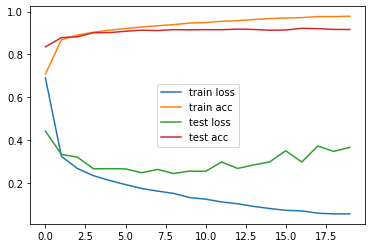

In [15]:
train_record = np.array(train_rec)
test_record = np.array(test_rec)

plt.plot(train_record[:,0], label='train loss')
plt.plot(train_record[:,1], label='train acc')
plt.plot(test_record[:,0], label='test loss')
plt.plot(test_record[:,1], label='test acc')
plt.legend(loc='best')

In [16]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

cols, rows = 8, 2
figure = plt.figure(figsize=(cols*2, rows*2))

model.eval()
with torch.no_grad():
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(test_data), size=(1,)).item()
        img, label = test_data[sample_idx]
        pred = model(torch.unsqueeze(img, dim=0)) 
        predict_label = pred[0].argmax(0).cpu().item()
        figure.add_subplot(rows, cols, i)
        plt.title(f'{labels_map[label]} -- {labels_map[predict_label]}')
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap='gray')
    plt.show()

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor